<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/DNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%ls


LearningVariables.xlsx  LearningY.xlsx  untitled_project/


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.8.0


In [8]:
x_train = pd.read_excel('LearningVariables.xlsx')
x_labels = pd.read_excel('LearningY.xlsx')
test_input=pd.read_excel('LearningVariables.xlsx',sheet_name='X_cv')
test_output=pd.read_excel('LearningY.xlsx',sheet_name='X_cv')

In [9]:
train_data=pd.concat([x_train,x_labels], axis=1)
test_data=pd.concat([test_input, test_output], axis=1)

In [10]:
raw_dataset = train_data

In [11]:
dataset = raw_dataset.copy()
dataset.tail()

fc20     fy20    cover    depth      area            MR
1995  45.04625  326.575  0.06181  0.26540  0.000534  35190.350276
1996  51.41625  340.525  0.05461  0.29724  0.000349  28731.341444
1997  73.61375  487.225  0.03665  0.27276  0.000134  15422.047412
1998  71.20875  660.925  0.04467  0.18876  0.000391  36791.432479
1999  18.39625  785.575  0.05543  0.25428  0.000468  69494.760199

In [12]:
dataset.isna().sum()

fc20     0
fy20     0
cover    0
depth    0
area     0
MR       0
dtype: int64

In [13]:
dataset.shape

(2000, 6)

In [14]:
dataset = dataset.dropna()

In [15]:
dataset.isna().sum()

fc20     0
fy20     0
cover    0
depth    0
area     0
MR       0
dtype: int64

In [16]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

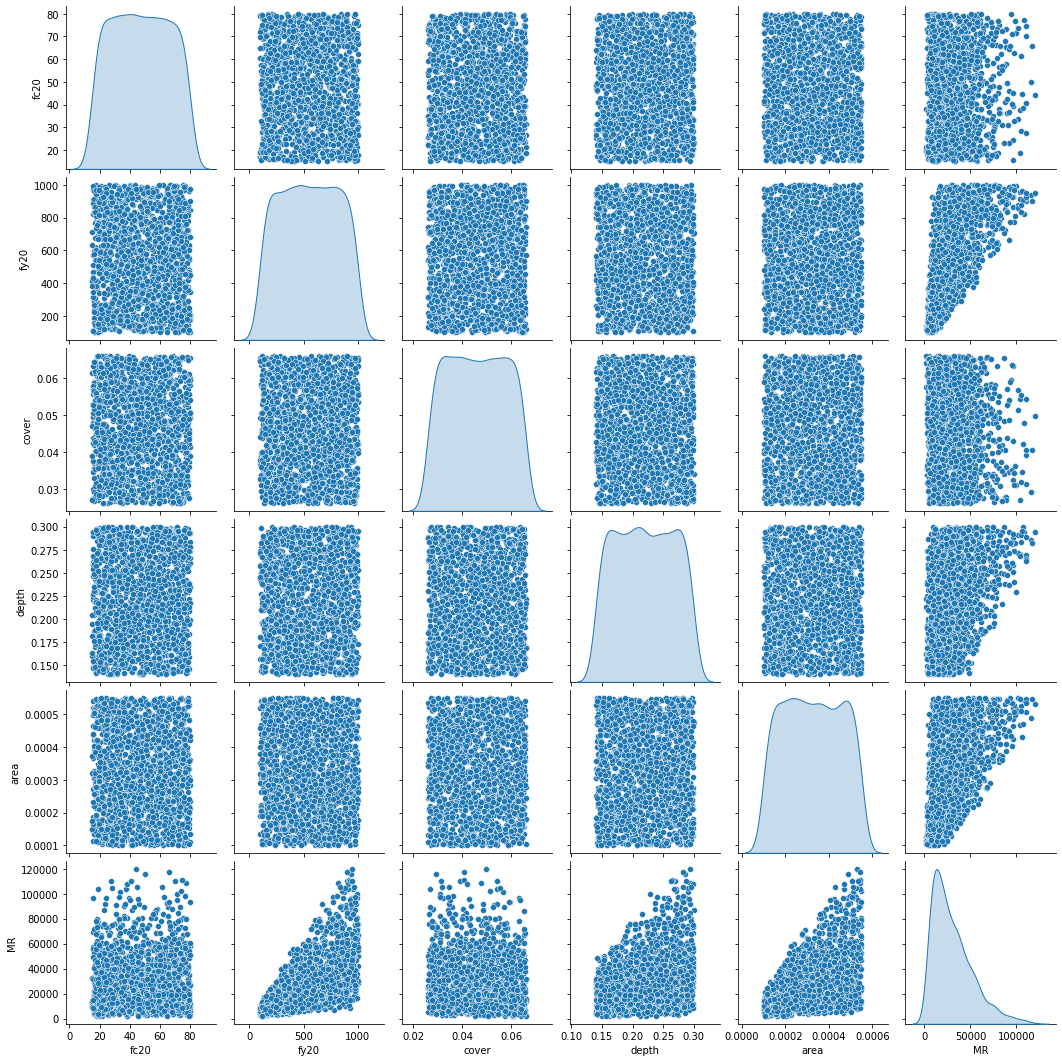

In [17]:
sns.pairplot(train_dataset, diag_kind='kde')

In [18]:
train_dataset.describe().transpose()

count          mean           std          min           25%  \
fc20   1600.0     47.311155     18.616847    15.016250     31.355625   
fy20   1600.0    549.758969    258.836783   100.225000    329.612500   
cover  1600.0      0.045950      0.011573     0.026010      0.035865   
depth  1600.0      0.219855      0.046446     0.140040      0.179380   
area   1600.0      0.000325      0.000131     0.000100      0.000213   
MR     1600.0  30493.251017  21937.890037  1711.026896  13221.273598   

                50%           75%            max  
fc20      47.077500     63.351875      79.983750  
fy20     548.650000    772.637500     999.775000  
cover      0.045880      0.055975       0.065990  
depth      0.219120      0.260540       0.299960  
area       0.000323      0.000440       0.000550  
MR     24928.338030  42019.092226  120039.686055

In [19]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = (train_features.pop('MR'))//1000
test_labels = (test_features.pop('MR'))//1000

In [20]:
train_labels /= 1000
test_labels /= 1000

In [21]:
train_dataset.describe().transpose()[['mean', 'std']]

mean           std
fc20      47.311155     18.616847
fy20     549.758969    258.836783
cover      0.045950      0.011573
depth      0.219855      0.046446
area       0.000325      0.000131
MR     30493.251017  21937.890037

In [22]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [23]:
normalizer.adapt(np.array(train_features))

In [24]:
print(normalizer.mean.numpy())

[[ 47.311 549.759   0.046   0.22    0.   ]]


In [25]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 65.36 655.98   0.03   0.28   0.  ]]

Normalized: [[ 0.97  0.41 -1.01  1.35 -1.5 ]]


In [26]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [27]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [28]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 8.37 s, sys: 461 ms, total: 8.83 s
Wall time: 7.9 s


In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  val_loss  epoch
95  0.037787  0.051447     95
96  0.037565  0.058657     96
97  0.039221  0.012814     97
98  0.024426  0.026154     98
99  0.034898  0.049094     99

In [30]:
history_dict = history.history.values

In [31]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Training_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([-.5, 0.4])
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute error [MAE]')
  plt.legend()
  plt.grid(True)
  plt.title('Learning_Curve[MR]')

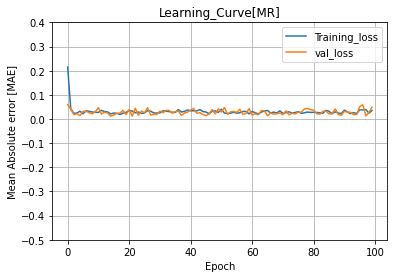

In [32]:
plot_loss(history)


In [33]:
Y_pred = linear_model.predict(test_features)

In [34]:
Y_test = test_labels

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
# Metrics
R_square=r2_score(Y_pred,Y_test)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [37]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)

The computed root mean squared error is =  0.06290540862577773
The computed mean absolute error is =  0.05109604174651206
The r2 measure for the model is =  0.01674322172678444


In [56]:
plt.figure(figsize=(8,16))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red',label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 6, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()

DEEP Learning 

In [57]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [58]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                384       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,620
Trainable params: 4,609
Non-trainable params: 11
_________________________________________________________________


In [59]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 11 s, sys: 687 ms, total: 11.7 s
Wall time: 10.1 s


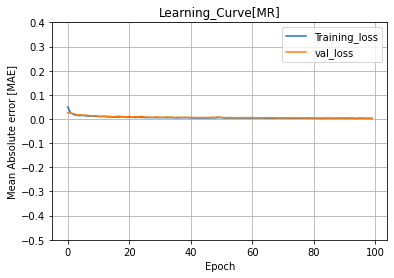

In [60]:
plot_loss(history)

In [61]:
Y_pred = dnn_model.predict(test_features)

In [62]:
Y_test = test_labels

In [63]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [64]:
R_square=r2_score(Y_pred,Y_test)
rmse=np.sqrt(mean_squared_error(Y_pred,Y_test))
mae=mean_absolute_error(Y_pred,Y_test)

In [65]:
print("The computed root mean squared error is = ",rmse)
print("The computed mean absolute error is = ",mae)
print("The r2 measure for the model is = ",R_square)

The computed root mean squared error is =  0.0044093980495631055
The computed mean absolute error is =  0.003548736863490194
The r2 measure for the model is =  0.9583133930054358


In [66]:
plt.figure(figsize=(6,15))
plt.scatter(Y_test, Y_pred, c='blue',label='Reference Line')
plt.plot(Y_test,Y_test, color='red', linewidth=2,label="Model Prediction")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.tight_layout()
plt.legend()
textstr = '$R^{2}=%.2f$' % R_square
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2, 8, textstr, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()